In [1]:
# importing the required modules

import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.fft import fft, fftfreq, fftshift

In [2]:
# info about the data
trial = 1
sig_name = 'NEGRES19.CSV'
ref_name = 'NEGRES20.CSV'
data_path = r'C:\Users\Dell\Desktop\adhil-anagha_expeyes\Lockin_expeyes\data\trial'

# importing the csv files
sig = csv.reader(open(f'{data_path}{trial}\{sig_name}', 'r'))
ref = csv.reader(open(f'{data_path}{trial}\{ref_name}', 'r'))

# extracting the data from the csv files
sig_data = []
ref_data = []
for row in sig:
    sig_data.append(row)
for row in ref:
    ref_data.append(row)

# converting the data to numpy arrays
sig_data = np.array(sig_data)
ref_data = np.array(ref_data)

In [3]:
print(sig_data)
print(sig_data.shape)

[['in s' 'C1 in V']
 ['-3.00001E+00' '1.922E-02']
 ['-2.99996E+00' '2.020E-02']
 ...
 ['2.99986E+00' '3.475E-02']
 ['2.99991E+00' '3.455E-02']
 ['2.99996E+00' '3.367E-02']]
(119049, 2)


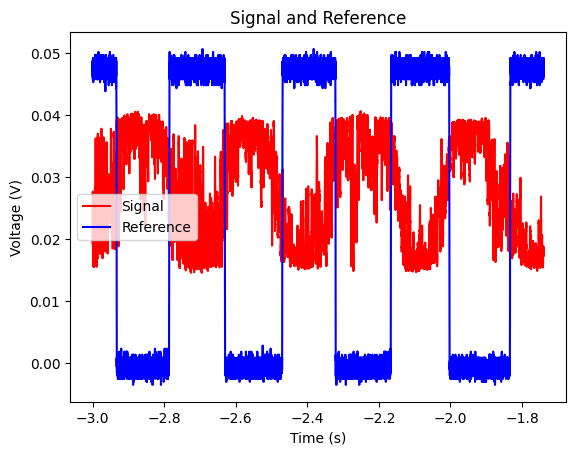

In [4]:
N_sample = 25000
# N_sample = sig_data.shape[0] - 1

sig_data = sig_data[1:N_sample,:].astype(float)
sig_data = np.transpose(sig_data)
ref_data = ref_data[1:N_sample,:].astype(float)
ref_data = np.transpose(ref_data)

# plotting the data
plt.plot(sig_data[0], sig_data[1], 'r', label='Signal')
plt.plot(ref_data[0], ref_data[1], 'b', label='Reference')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Signal and Reference')
plt.legend()
plt.show()

24999


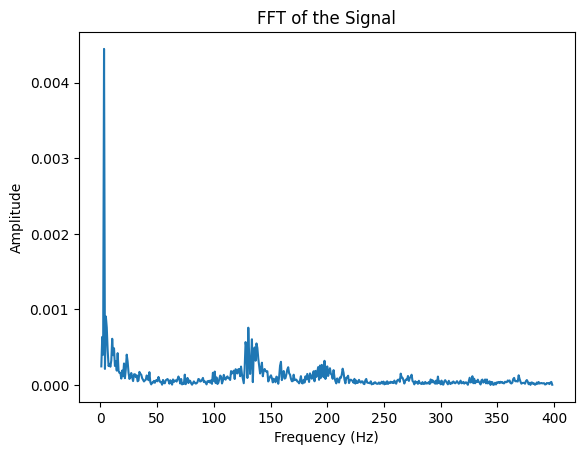

In [5]:
# calculating the fft of the signal

# number of sample points
N = len(sig_data[0])
# sample spacing
T = sig_data[0][1] - sig_data[0][0]

# calculating the fft
yf = fft(sig_data[1])
xf = fftfreq(N, T)

print(len(xf))

# excluding DC component
xf = xf[1:int(len(xf)/50)]
yf = yf[1:int(len(yf)/50)]

# plotting the fft
plt.plot(xf, 1.0/N * np.abs(yf))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of the Signal')
plt.show()

In [6]:
# visual check of the frequency
N_cycles  = 4
t_cycles = 1.2
f_Hz = 1/(t_cycles/N_cycles)
print(f"The frequency of the signal is {f_Hz:.4f} Hz")


# find max in yf and corresponding xf
max_yf = max(yf)
max_xf = xf[np.argmax(yf)]
print(f"The maximum amplitude is at {max_xf:.4f} Hz from FFT")

The frequency of the signal is 3.3333 Hz
The maximum amplitude is at 4.8002 Hz from FFT


In [ ]:
#triggering

# using np.gradient